Autores:

Autor 1: Matias Cartes Rivera, matias.cartes2001@alumnos.ubiobio.cl

Autor 2: Juan Carlos Francisco Poveda, juan.francisco2001@alumnos.ubiobio.cl

Profesora: Jazna Patricia Meza Hidalgo

Materia: Inteligencia Artificial

Entrega numero 5.

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from matplotlib import pyplot as plt
from time import time

2025-07-31 11:26:08.974027: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-31 11:26:08.976975: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-31 11:26:08.984592: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753975568.996629   98257 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753975569.000214   98257 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753975569.010743   98257 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# Setea los seed para números random

np.random.seed(29)
tf.random.set_seed(29)

In [3]:
# Carga datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
np.unique(labs_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
# Lista de nombres para usar como etiquetas

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

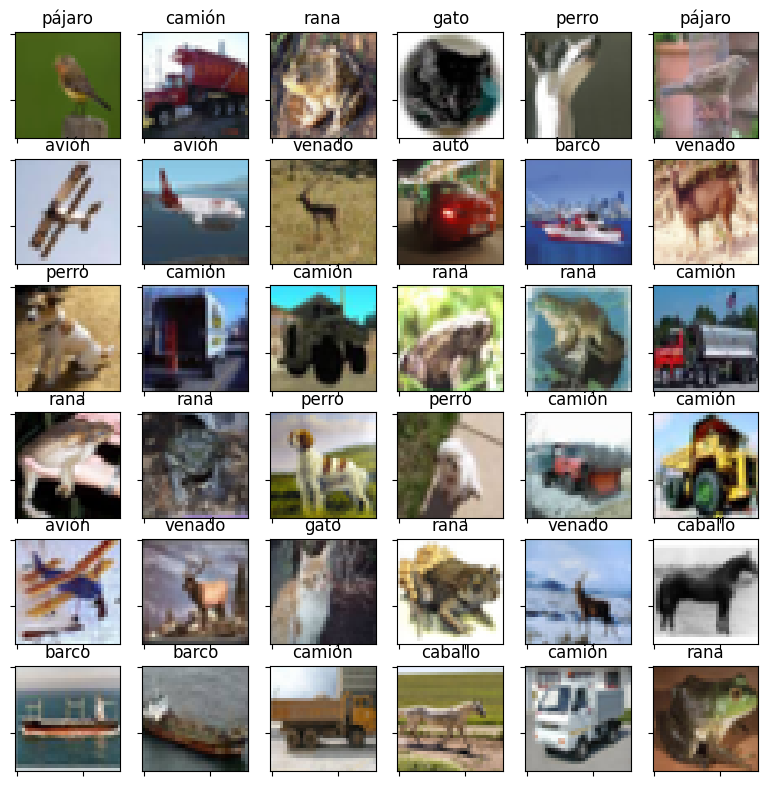

In [6]:
# Muestra una grilla de ejemplos (al azar)

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_train))
    axs[i,j].set_title(nombres[labs_train[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_train[ex])

In [7]:
# Tranforma los datos para el entrenamiento,
# Necesita transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
# Normaliza
X_train = X_train / 255
X_test = X_test / 255

print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)

print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [8]:
# Cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X_train.shape[0]
N = X_train.shape[1]
C = Y_train.shape[1]

print(M,N,C)

50000 3072 10


In [9]:
# Crea la red feed-forward (tiene 3 capas escondidas!)

h1 = 512
h2 = 256

red = keras.Sequential(name="Red_Evaluacion")
red.add(keras.layers.Input(shape=(N,), name='entrada'))
red.add(keras.layers.Dense(h1, activation='relu', name="Primera_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Segunda_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Tercera_capa"))
red.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

2025-07-31 11:26:14.191304: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "Red_Evaluacion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida (Dense)             │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Entrena la red
start_time_base = time()
num_epocas = 5
x_batch_size = 128
history = red.fit(X_train, Y_train,
                        epochs = num_epocas,
                        batch_size=x_batch_size,
                        validation_data=(X_test,Y_test))
end_time_base = time()
print("Train time: %0.10f seconds." % (end_time_base - start_time_base))

Epoch 1/5


2025-07-31 11:26:14.425697: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2931 - loss: 1.9853 - val_accuracy: 0.3312 - val_loss: 1.8722
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3628 - loss: 1.8101 - val_accuracy: 0.3642 - val_loss: 1.7866
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3870 - loss: 1.7391 - val_accuracy: 0.3860 - val_loss: 1.7287
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4030 - loss: 1.6873 - val_accuracy: 0.4002 - val_loss: 1.6908
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4178 - loss: 1.6463 - val_accuracy: 0.4149 - val_loss: 1.6521
Train time: 7.2538042068 seconds.


# Evaluación

## Experimentación

### Agregar más capas o más neuronas

Nota. Uno de los experimentos DEBE obtener un accuracy superior al 90%

#### Experimento 1 - 1 punto

#### Experimento 2 - 1 punto

In [11]:
h1 = 2048
h2 = 1024
h3 = 512
h4 = 256
h5 = 128

red_2 = keras.Sequential(name="Red_Evaluacion_Experimento2")
red_2.add(keras.layers.Input(shape=(N,), name='entrada'))
red_2.add(keras.layers.Dense(h1, activation='relu', name="Capa_1"))
red_2.add(keras.layers.Dense(h2, activation='relu', name="Capa_2"))
red_2.add(keras.layers.Dense(h2, activation='relu', name="Capa_3"))
red_2.add(keras.layers.Dense(h3, activation='relu', name="Capa_4"))
red_2.add(keras.layers.Dense(h3, activation='relu', name="Capa_5"))
red_2.add(keras.layers.Dense(h4, activation='relu', name="Capa_6"))
red_2.add(keras.layers.Dense(h4, activation='relu', name="Capa_7"))
red_2.add(keras.layers.Dense(h5, activation='relu', name="Capa_8"))
red_2.add(keras.layers.Dense(C, activation='softmax', name="Cap4_s4lida"))
red_2.summary()

red_2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Evaluacion_Experimento2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_1 (Dense)                  │ (None, 2048)           │     6,293,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_2 (Dense)                  │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_3 (Dense)                  │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_4 (Dense)                  │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_5 (Dense)                  │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_6 (Dense)                  │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_7 (Dense)                  │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_8 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Cap4_s4lida (Dense)             │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,460,042 (39.90 MB)

 Trainable params: 10,460,042 (39.90 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Entrena la red
start_time_exp2 = time()
num_epocas = 100
x_batch_size = 200
history = red_2.fit(X_train, Y_train,
                        epochs = num_epocas,
                        batch_size=x_batch_size,
                        validation_data=(X_test,Y_test))
end_time_exp2 = time()
print("Train time: %0.10f seconds." % (end_time_exp2 - start_time_exp2))

Epoch 1/100


2025-07-31 11:26:21.746705: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.2063 - loss: 2.1905 - val_accuracy: 0.2580 - val_loss: 2.0424
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.2933 - loss: 1.9700 - val_accuracy: 0.3281 - val_loss: 1.8808
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.3325 - loss: 1.8679 - val_accuracy: 0.3545 - val_loss: 1.8136
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.3576 - loss: 1.7980 - val_accuracy: 0.3686 - val_loss: 1.7584
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3772 - loss: 1.7428 - val_accuracy: 0.3777 - val_loss: 1.7215
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3939 - loss: 1.6978 - val_accuracy: 0.3896 - val_loss: 1.6907
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4092 - loss: 1.6581 - val_accuracy: 0.4080 - val_loss: 1.6478
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4244 - loss: 1.6224 - val_accuracy

### Descripción de arquitectura de las redes de los experimentos

#### Red experimento 1 - 1 punto

#### Red experimento 2 - 1 punto

**Para el experimento número 2:**

Tenemos una entrada de 3072 neuronas que corresponden a la imágen aplanada de 32x32x3 pixeles.

**Capa 1 (Capa_1):**


*   Entrada: 3072 neuronas (la imágen)
*   Salida: 2048 neuronas
*   Cálculo:
    *   Pesos = 3072 × 2048 = 6,291,456
    *   Sesgos = 2048
    *   Total = 6,291,456 + 2,048 = 6,293,504 parametros

**Capa 2 (Capa_2):**

*   Entrada: 2048 (salida de la capa 1)
*   Salida: 1024
*   Cálculo:
    *   Pesos = 2048 × 1024 = 2,097,152
    *   Sesgos = 1024
    *   Total = 2,097,152 + 1,024 = 2,098,176 parametros

**Capa 3 (Capa_3):**

*   Entrada: 1024 (salida de la capa 2)
*   Salida: 1024
*   Cálculo:
    * Pesos = 1024 × 1024 = 1,048,576
    *   Sesgos = 1024
    *   Total = 1,048,576 + 1,024 = 1,049,600 parametros

**Capa 4 (Capa_4):**

*   Entrada: 1024 (salida de la capa 3)
*   Salida: 512
*   Cálculo:
    *   Pesos = Pesos = 1024 × 512 = 524,288
    *   Sesgos = Biases = 512
    *   Total = 524,288 + 512 = 524,800 parametros

**Capa 5 (Capa_5):**

*   Entrada: 512 (salida de la capa 4)
*   Salida: 512
*   Cálculo:
    *   Pesos = 512 × 512 = 262,144
    *   Sesgos = 512
    *   Total = 262,144 + 512 = 262,656 parametros

**Capa 6 (Capa_6):**

*   Entrada: 512 (salida de la capa 5)
*   Salida: 256
*   Cálculo:
    *   Pesos = 512 × 256 = 131,072
    *   Sesgos = 256
    *   Total = 131,072 + 256 = 131,328 parametros

**Capa 7 (Capa_7):**

*   Entrada: 256 (salida de la capa 6)
*   Salida: 256
*   Cálculo:
    *   Pesos = 256 × 256 = 65,536
    *   Sesgos = 256
    *   Total = 65,536 + 256 = 65,792 parametros

**Capa 8 (Capa_8):**

*   Entrada: 256 (salida de la capa 7)
*   Salida: 128
*   Cálculo:
    *   Pesos = 256 × 128 = 32,768
    *   Sesgos = 128
    *   Total = 32,768 + 128 = 32,896 parametros


**Capa de Salida (Capa_salida):**

*   Entrada: 128
*   Salida: 10 (una por clase)
*   Cálculo:
    *   Pesos = 128 × 10 = 1,280
    *   Sesgos = 10
    *   Total = 1,280 + 10 = 1,290


Todo esto nos da un total de: 10,460,042 parametros, que son los elementos que la red aprende durante el entrenamiento.
Se puede apreciar un diseño de embudo (Funnel Design). Al principio, las capas tienen muchas neuronas para absorber muchos patrones posibles.
Luego el modelo se va reduciendo progresivamente en dimensionalidad, lo cual sirve para hacer compresión de características y evitar overfitting.

Por otra parte, podemos ver que el entrenamiento se hace por 100 épocas y un batch size de 200, lo cual es costoso y lento si no se usa aceleración por GPU.

## Análisis comparativo

### Mostrar los tiempos que tomó el entrenamiento entre el modelo base y los 2 experimentos - 0,1 puntos

In [13]:
tiempo_exp2 = end_time_exp2 - start_time_exp2
tiempo_base = end_time_base - start_time_base
print("Train time para el caso base: %0.10f seconds." % (tiempo_base))

print("Train time para el experimento 2: %0.10f seconds." % (tiempo_exp2))

print("El experimento 2 tomó un tiempo de entrenamiento de %0.10f segundos más que el modelo base." % (tiempo_exp2 - tiempo_base))


Train time para el caso base: 7.2538042068 seconds.
Train time para el experimento 2: 534.2468895912 seconds.
El experimento 2 tomó un tiempo de entrenamiento de 526.9930853844 segundos más que el modelo base.


### Mostrar curvas de entrenamiento/validación - 0,1 puntos

Curvas Experimento 2:

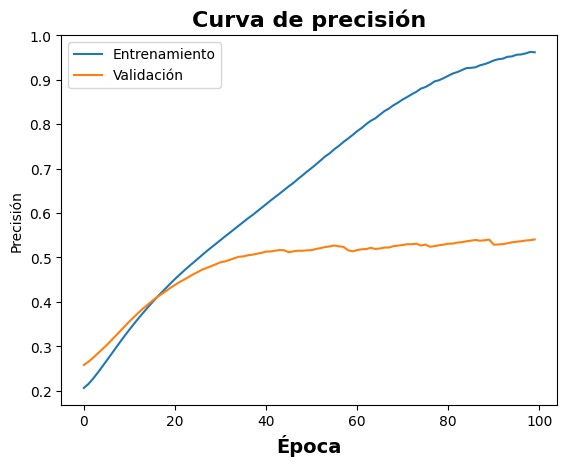

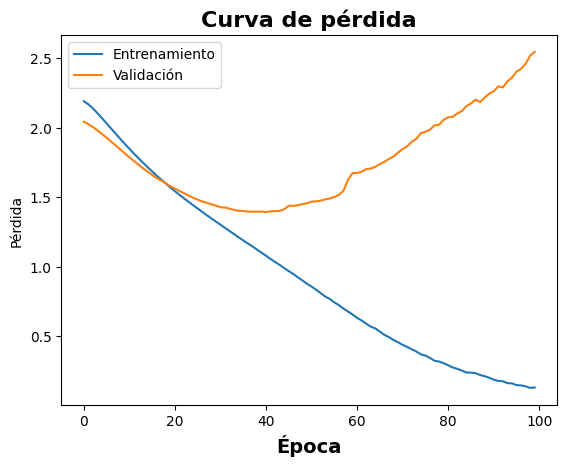

In [17]:
def smooth_curve(points, factor=0.9):
    smoothed = []
    for point in points:
        if smoothed:
            smoothed.append(smoothed[-1] * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

plt.plot(smooth_curve(history.history['accuracy']), label='Entrenamiento')
plt.plot(smooth_curve(history.history['val_accuracy']), label='Validación')
plt.title('Curva de precisión', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(smooth_curve(history.history['loss']), label='Entrenamiento')
plt.plot(smooth_curve(history.history['val_loss']), label='Validación')
plt.title('Curva de pérdida', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.ylabel('Pérdida')
plt.legend()
plt.show()




---


## Discusiones



---



### ¿Existe sobreajuste? (responder 0,2 puntos y argumentar 0,8 puntos)

Para el caso del experimento 2, si, existe un sobreajuste considerable, esto se evidencia en la alta precisión de entrenamiento de hasta 99%, pero con una precisión bastante baja, de alrededor a un 55%, esto ocurre debido a la alta cantidad de capaz, neuronas y millones de parámetros de la red, lo que si bien permite que el modelo aprenda datos de entrenamiento con mayor facilidad, esta no logra generalizar correctamente para datos nuevos.

### ¿Qué tan bien funciona una red feedforward con imágenes? - 0,2 puntos

Las redes feedforward no son ideales para tareas de clasificación de imágenes complejas como CIFAR-10, ya que no pueden extraer patrones espaciales relevantes, esto debido que al aplanar la imágen, pasa de ser una estructura de 2D o 3D a un vector 1D, esto hace que la red no tenga una noción de que píxeles están cerca entre sí, ni de patrones visuales como bordes, formas o texturas. Por el contrario, trata cada píxel como una característica independiente.

### Limitaciones encontradas en el desarrollo del trabajo (indicar 3) - 0,6 puntos

* Una de las limitaciones encontradas fue el intentar aumentar el accuracy sin aumentar drasticamente el sobreajuste, el accuracy se mantuvo en alrededor de un 55% y no fuimos capaces de aumentarlo más allá.
* Debido a lo costoso de los modelos, el entrenamiento tomaba un tiempo considerable entre cada experimento, esto es una limitación de hardware debido a que no poseemos una tarjeta gráfica capaz de hacer aceleración por hardware (CUDA o ROCm).
